In [1]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import Select, SelectMultiple
#import umap
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler
from windrose import WindroseAxes
import numpy as np
import matplotlib.cm as cm

df = pd.read_csv("doctor-who.csv", delimiter=",")
df = df.dropna(subset=['details'])
df

,idx,text,type,details,episodeid,doctorid
2,2,Where's mother?,talk,REMUS,21-7,6
3,3,She's busy.,talk,SYLVEST,21-7,6
4,4,Does that mean she isn't talking to us?,talk,ROMULUS,21-7,6
5,5,"No, she's just busy.",talk,SYLVEST,21-7,6
6,6,We would like to see her.,talk,BOTH,21-7,6
...,...,...,...,...,...,...
319841,1198,You're expecting someone else?,talk,DOCTOR,21-6,5
319843,1200,"I, I, I.",talk,PERI,21-6,5
319844,1201,That's three I's in one breath. Makes you sou...,talk,DOCTOR,21-6,5
319845,1202,What's happened?,talk,PERI,21-6,5


In [120]:
df.describe()

,idx,doctorid
count,245632.000000,245632.000000
mean,799.668891,5.263944
std,1072.481236,3.609459
min,0.000000,1.000000
25%,268.750000,2.000000
50%,547.000000,4.000000
75%,995.000000,9.000000
max,10160.000000,13.000000


In [97]:
ddf = df.select_dtypes(include=['object'])
ddf


,text,type,details,episodeid
2,Where's mother?,talk,REMUS,21-7
3,She's busy.,talk,SYLVEST,21-7
4,Does that mean she isn't talking to us?,talk,ROMULUS,21-7
5,"No, she's just busy.",talk,SYLVEST,21-7
6,We would like to see her.,talk,BOTH,21-7
...,...,...,...,...
319841,You're expecting someone else?,talk,DOCTOR,21-6
319843,"I, I, I.",talk,PERI,21-6
319844,That's three I's in one breath. Makes you sou...,talk,DOCTOR,21-6
319845,What's happened?,talk,PERI,21-6


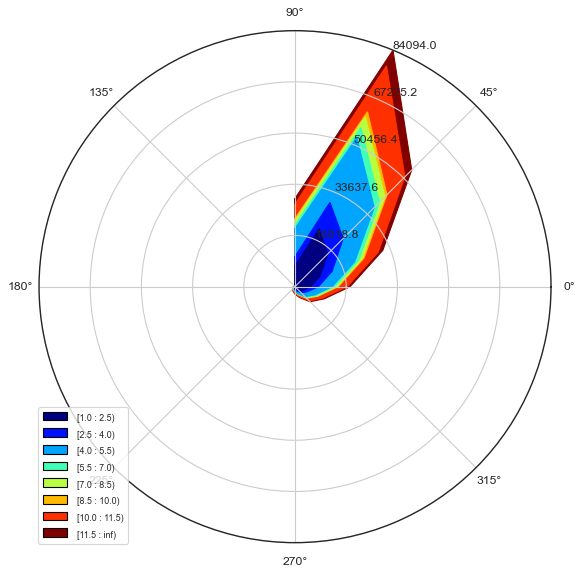

In [129]:
from windrose import WindroseAxes
import numpy as np
import matplotlib.colors as mcolors

ws = df['text']
wd = df['details']
df['lengthText']=[len(str(x)) for x in ws]
# df['lengthDetails']=[len(str(x)) for x in wd]
# df

ld = df['lengthText']
# ld = df['lengthDetails']
lt = df['doctorid']

# ls.max()
ax = WindroseAxes.from_ax()
ax.contourf(ld, lt, bins=np.arange(lt.min(), lt.max(), (lt.max()-lt.min())/8))
ax.set_legend()

In [117]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

df.head()

,idx,text,type,details,episodeid,doctorid,lengthText,lengthDetails
2,2,Where's mother?,talk,REMUS,21-7,6,16,5
3,3,She's busy.,talk,SYLVEST,21-7,6,12,7
4,4,Does that mean she isn't talking to us?,talk,ROMULUS,21-7,6,40,7
5,5,"No, she's just busy.",talk,SYLVEST,21-7,6,21,7
6,6,We would like to see her.,talk,BOTH,21-7,6,26,4


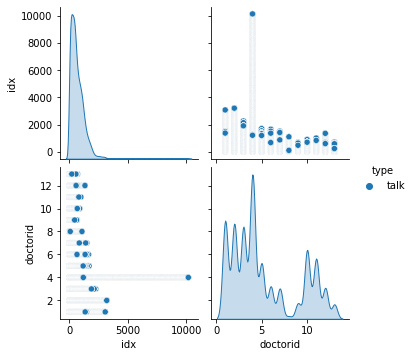

In [2]:
df.type.value_counts()
sns.pairplot(df, hue='type')

Text(0.5, 1.0, 'Correlation')

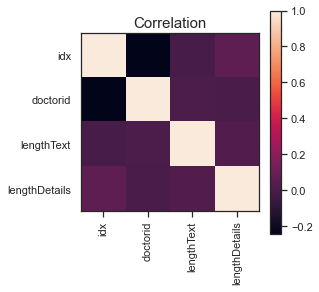

In [128]:
corr = df.corr()
corrMat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.title("Correlation", fontsize=15)

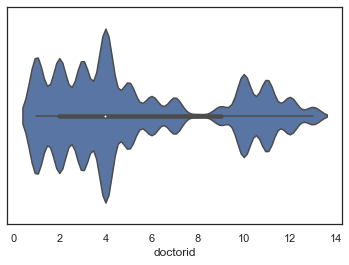

In [133]:
ax = sns.violinplot(x='doctorid', data=df)

<AxesSubplot:xlabel='episodeid'>

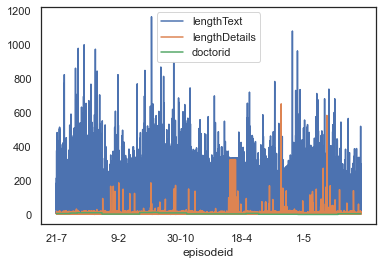

In [153]:
df.plot(x="episodeid", y=["lengthText", "lengthDetails", "doctorid"])